### Import Libraries

In [89]:
from arcgis.gis import GIS

### Connect to Web GIS organizations

In [ ]:
source = GIS(profile="gis_action")
target = GIS(profile="your_enterprise_profile")

### Search for source org Group from which to export content

<Group title:"Italian_Data" owner:action_jackson>
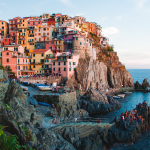

In [91]:
ita_group = source.groups.search("Italian_Data")[0]
ita_group

In [92]:
ita_group.content()

[<Item title:"ITA_natural_feats" type:Shapefile owner:action_jackson>,
 <Item title:"ITA_natural_feats" type:Feature Layer Collection owner:action_jackson>,
 <Item title:"ITA_streams" type:Shapefile owner:action_jackson>,
 <Item title:"ITA_streams" type:Feature Layer Collection owner:action_jackson>]

### Initialize Source GroupMigratonManager 

In [93]:
grp_mgr = ita_group.migration
type(grp_mgr)

arcgis.gis.GroupMigrationManager

### Create Export Package Job

In [94]:
ita_job = grp_mgr.create()

In [95]:
import time

while ita_job.status != "completed":
    job_status = ita_job.status
    if job_status == "failed":
        break
    else:
        print(job_status)
        time.sleep(5)
print(f"Job Status: {ita_job.status}")

processing
processing
processing
processing
processing
processing
processing
Job Status: completed


### Inspect Job Results

In [96]:
ita_epk_item = ita_job.result()
ita_epk_item

<Item title:"Italian_Data_2024313_123133.epk" type:Export Package owner:action_jackson>

In [97]:
grp_mgr.inspect(ita_epk_item)["results"]

[{'id': 'b60819484e264b97b3b6518f726c73d7',
  'type': 'Shapefile',
  'title': 'ITA_streams',
  'size': 1985949,
  'exists': True,
  'canImport': True,
  'created': 1710311695814,
  'modified': 1710311695814},
 {'id': '0bfd0232314d4334a847fe818100cdc3',
  'type': 'Feature Service',
  'title': 'ITA_natural_feats',
  'size': 4218057,
  'exists': True,
  'canImport': True,
  'created': 1710311573264,
  'modified': 1710311643877},
 {'id': 'aea26570e61d4d6588951eb43d987b56',
  'type': 'Shapefile',
  'title': 'ITA_natural_feats',
  'size': 4218057,
  'exists': True,
  'canImport': True,
  'created': 1710311571279,
  'modified': 1710311571279},
 {'id': 'dde0e850d8374825ad03f651e27ad7e0',
  'type': 'Feature Service',
  'title': 'ITA_streams',
  'size': 1985949,
  'exists': True,
  'canImport': True,
  'created': 1710311697833,
  'modified': 1710311733940}]

### Download the Export Package

In [98]:
down_res = ita_epk_item.download(save_path=r"/path/on/system/data_formats/epk_pkgs",
                                 file_name=r"ita_download.epk")
down_res

'/path/on/system/data_formats/epk_pkgs/ita_download.epk'

### Add Export Package to Target organization

In [99]:
target_epk_item = target.content.add(item_properties={"title" : "ita_data_exp_pkg",
                                                      "tags" : "ITA, environment, hydrology",
                                                      "snippet": "Natural resource data for Italy.",
                                                      "type": "Export Package"},
                                     data=down_res)
target_epk_item

<Item title:"ita_data_exp_pkg" type:Export Package owner:weg_gis_admin>

### Search for target org Group for which to import content

In [100]:
target.users.me

<User username:weg_gis_admin>

<Group title:"Italy Natural Environment" owner:weg_gis_admin>
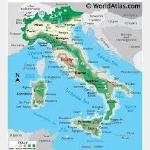

In [101]:
target_grp = target.groups.search("Italy Natural Environment")[0]
target_grp

In [102]:
target_grp.id

'fb52590cc18d45548987db6762ac1626'

### Initialize Target GroupMigrationManager

In [103]:
target_grp_mgr = target.groups.get(target_grp.id).migration

### Load the Group content into the Target

In [104]:
target_epk_job = target_grp_mgr.load(epk_item=target_epk_item)

In [105]:
import time

while target_epk_job.status != "completed":
    job_status = target_epk_job.status
    if job_status == "failed":
        break
    else:
        print(job_status)
        time.sleep(5)
print(f"Job Status: {target_epk_job.status}")

processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
processing
Job Status: completed


In [106]:
target_epk_job.messages

["Starting import of items from EPK item '8c4a3733d03648b0b31365bf47abcc91' to group 'Italy Natural Environment'.",
 "Starting the import of exported package item '8c4a3733d03648b0b31365bf47abcc91' containing 4 items.",
 "Import option to overwrite items if they exist is set to 'true'."]

In [107]:
target_epk_job.result()

{'itemsImported': [<Item title:"ITA_streams" type:Shapefile owner:weg_gis_admin>,
  <Item title:"ITA_natural_feats" type:Feature Layer Collection owner:weg_gis_admin>,
  <Item title:"ITA_natural_feats" type:Shapefile owner:weg_gis_admin>,
  <Item title:"ITA_streams" type:Feature Layer Collection owner:weg_gis_admin>],
 'itemsSkipped': [],
 'itemsFailedImport': []}